In [2]:
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv('iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#deleting unwanted colomuns
df=df.drop(columns=['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#to display the stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#to display datatypes in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#to display the samples of each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#check for the null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

tarory data analysis

<AxesSubplot:>

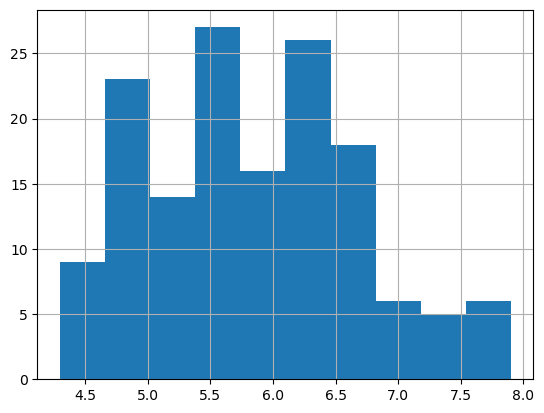

In [10]:
df['SepalLengthCm'].hist()

<AxesSubplot:>

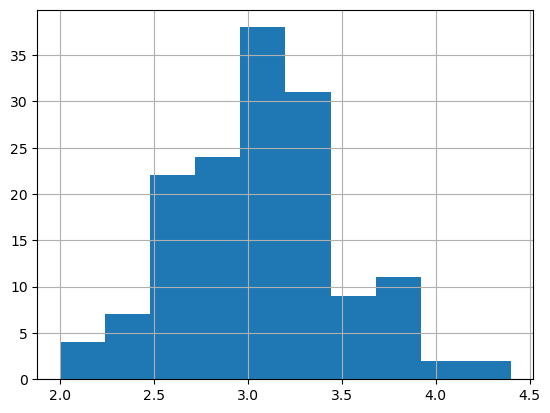

In [11]:



df['SepalWidthCm'].hist()

<AxesSubplot:>

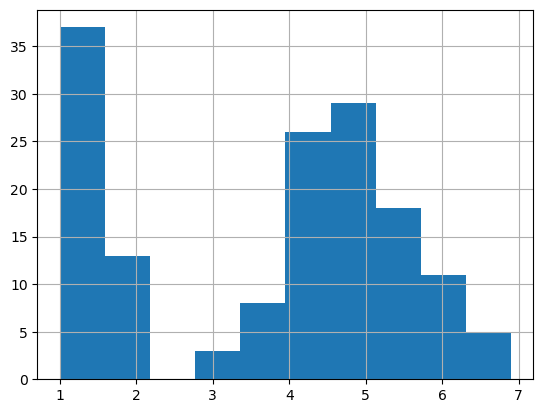

In [12]:
df['PetalLengthCm'].hist()

<AxesSubplot:>

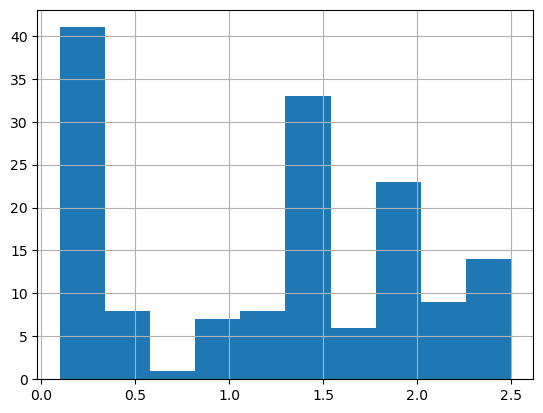

In [13]:
df['PetalWidthCm'].hist()

In [14]:
#scatterplot
colors=['red','orange','blue']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']

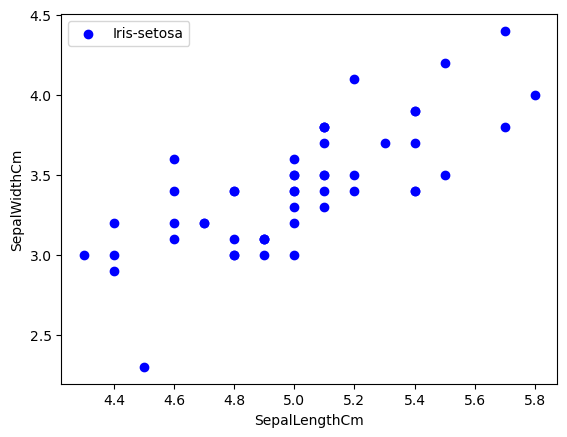

In [17]:
for i in range(3):
  x=df[df['Species'] == species[i]]
plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'],c = colors[i],label = species[i])
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.legend()

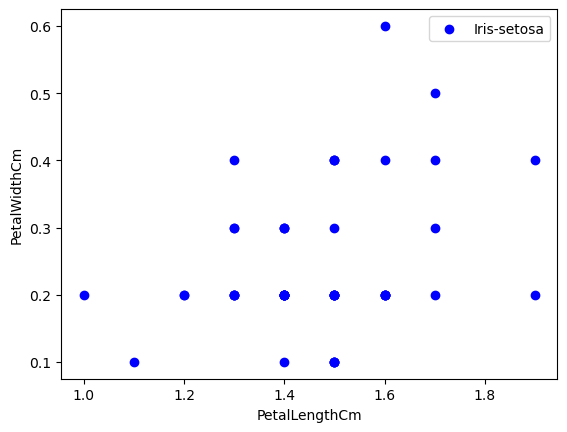

In [18]:
for i in range(3):
  x=df[df['Species'] == species[i]]
plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'],c = colors[i],label = species[i])
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.legend()

coorelation matrix

In [19]:
#corelation matrix
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

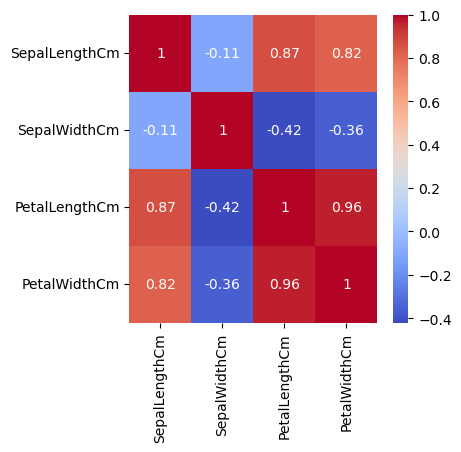

In [20]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(corr,annot=True,ax=ax,cmap='coolwarm')

LABEL ENCODER
converting the labels into numeric form so to convert it into machine readleble form


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [22]:
df['Species']=le.fit_transform(df['Species'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


MODEL TRAINING

In [23]:
from sklearn.model_selection import train_test_split
#train-80
#test-20
x=df.drop(columns=['Species'])
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [25]:
#model training
model.fit(x_train,y_train)

C:\Users\rpshi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
#print matrix to get pe formance
print("accuracy:",model.score(x_test,y_test))

accuracy: 1.0


In [29]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [31]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [32]:
print("accuracy:",model.score(x_test,y_test))

accuracy: 1.0


C:\Users\rpshi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [34]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [36]:
print("accuracy:",model.score(x_test,y_test))

accuracy: 0.9666666666666667
